In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D, Bidirectional, ConvLSTM1D

In [2]:
df = pd.read_csv("C:/AI_study/abalone.csv")
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4177 non-null   int64  
 1   Sex             4177 non-null   object 
 2   Length          4177 non-null   float64
 3   Diameter        4177 non-null   float64
 4   Height          4177 non-null   float64
 5   Whole_weight    4177 non-null   float64
 6   Shucked_weight  4177 non-null   float64
 7   Viscera_weight  4177 non-null   float64
 8   Shell_weight    4177 non-null   float64
 9   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB


In [4]:
df['Sex'].value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

## Features
- id: id
- Sex: 성별 M(수컷), F(암컷), I(유아기)
- Length: 길이(앞에서 뒤까지, mm)
- Diameter: 지름(길이에 수직인 방향, mm)
- Height: 높이(껍질 포함, mm)
- Whole_weight: 전체 무게(껍질 포함, g)
- Shucked_weight: 무게(껍질 제거, g)
- Viscera_weight: 전복 내장 무게(g)
- Shell_weight: 건조 후 껍질 무게(g)
- Rings: 나선(전복의 나이 추정, 나이 = Rings + 1.5) - label

- 현재 Features 중 id의 경우는 단순히 0 ~ 4176까지 나열한 것이므로 필요 없음
- Sex의 경우 object형으로 M, F, I를 값으로 가지기 때문에 EDA하고 모델에 넣기 위해 Label Encoding이 필요

In [5]:
# 필요 없는 Feature인 id 제거
df = df.drop('id', axis=1)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


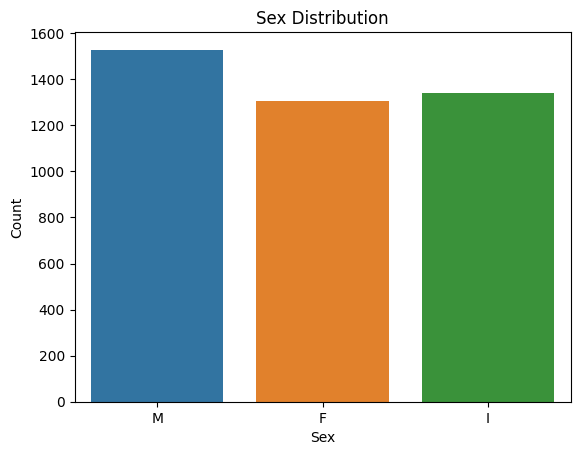

In [6]:
# Sex 분포 시각화
sns.countplot(data=df, x="Sex", hue="Sex", palette=["#1f77b4", "#ff7f0e", "#2ca02c"])
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Sex Distribution")

plt.show()

In [7]:
# Sex 피처에 Label Encoding 적용

from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
le = LabelEncoder()

df['Sex_encoded'] = le.fit_transform(df['Sex'])

df = df.drop('Sex', axis=1)
df.insert(0, 'Sex_encoded', df.pop('Sex_encoded'))

# 결과 확인
print(df)

      Sex_encoded  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0               2   0.455     0.365   0.095        0.5140          0.2245   
1               2   0.350     0.265   0.090        0.2255          0.0995   
2               0   0.530     0.420   0.135        0.6770          0.2565   
3               2   0.440     0.365   0.125        0.5160          0.2155   
4               1   0.330     0.255   0.080        0.2050          0.0895   
...           ...     ...       ...     ...           ...             ...   
4172            0   0.565     0.450   0.165        0.8870          0.3700   
4173            2   0.590     0.440   0.135        0.9660          0.4390   
4174            2   0.600     0.475   0.205        1.1760          0.5255   
4175            0   0.625     0.485   0.150        1.0945          0.5310   
4176            2   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
0             0.1010        0.1

In [8]:
df.describe()

,Sex_encoded,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [9]:
# 데이터 결측치 확인
df.isnull().sum()

Sex_encoded       0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [10]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

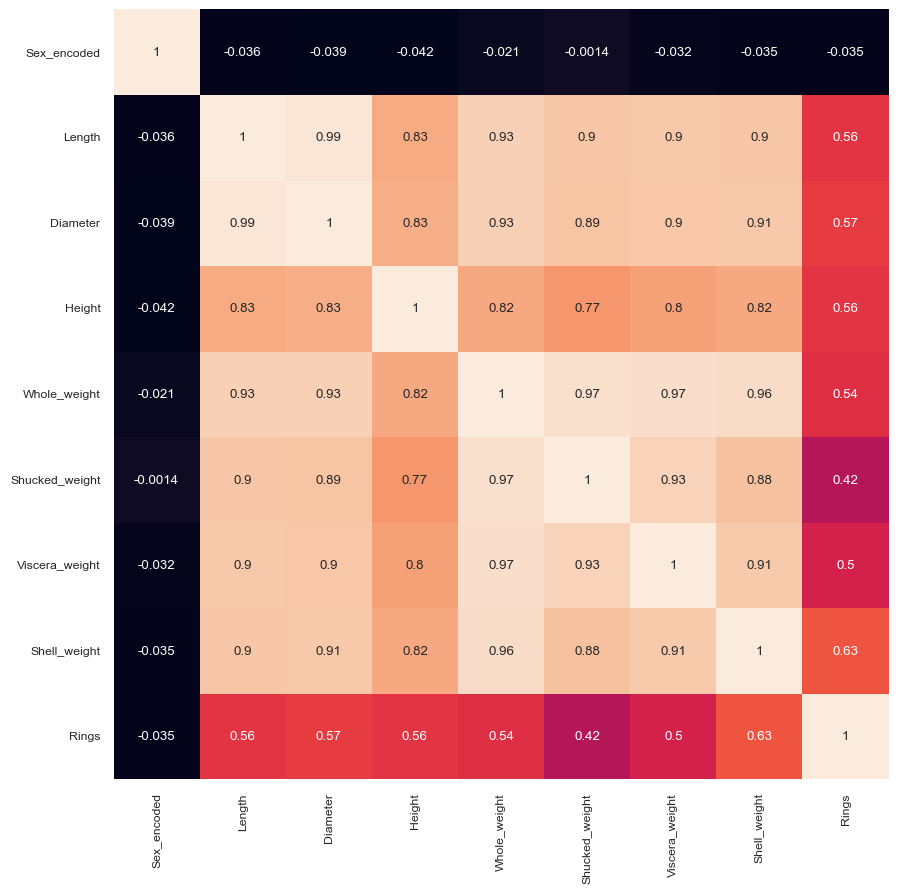

In [11]:
#상관관계 히트맵 생성
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

## Target인 Rings와 가장 높은 상관 관계를 맺는 feature
- Shell_weight(0.63)

## Target인 Rings와 비교적 낮은 상관 관계를 맺는 features
- Sex_encoded(-0.035)
- Shucked_weight(0.42)
- Visvera_weight(0.5)

- Sex_encoded의 경우 매우 낮은 상관 관계를 갖고 있기 때문에 추후에 삭제 가능 

array([[<Axes: title={'center': 'Sex_encoded'}>,
        <Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Whole_weight'}>,
        <Axes: title={'center': 'Shucked_weight'}>],
       [<Axes: title={'center': 'Viscera_weight'}>,
        <Axes: title={'center': 'Shell_weight'}>,
        <Axes: title={'center': 'Rings'}>]], dtype=object)

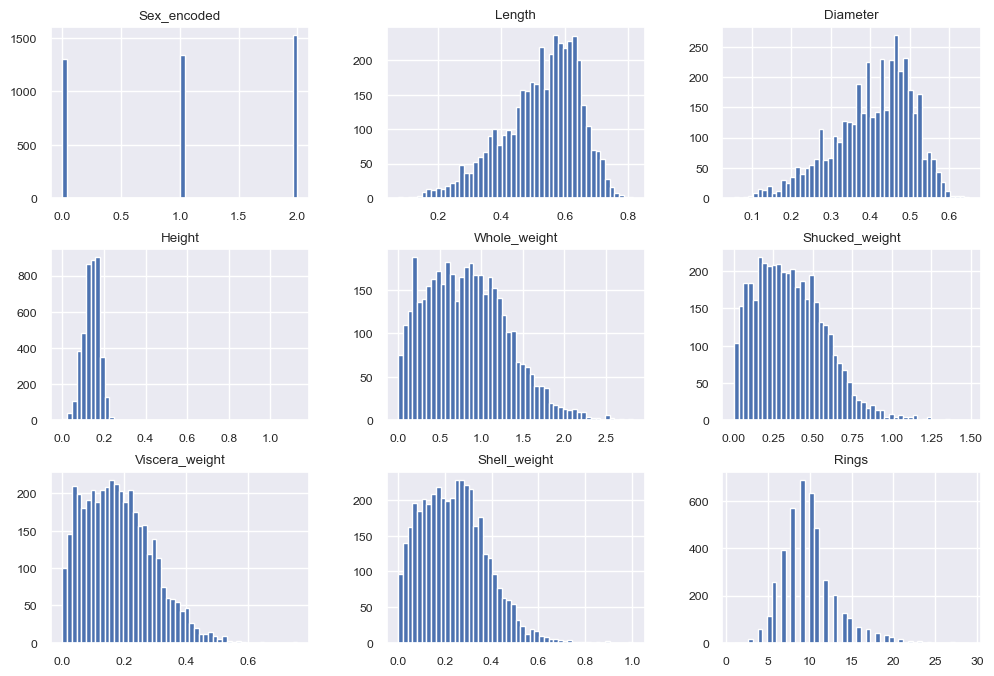

In [12]:
df.hist(bins=50, figsize=(12, 8))

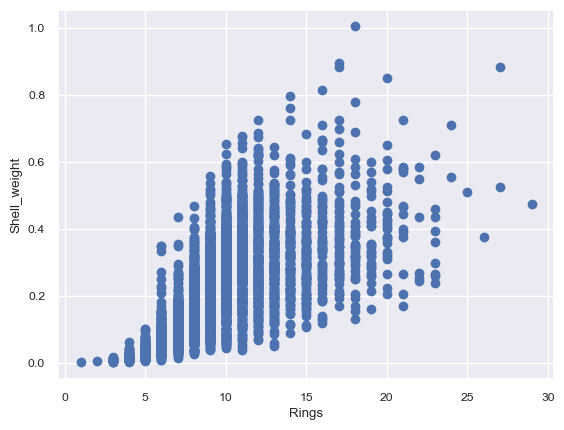

In [13]:
# Rings와 Shell_weight 관계
plt.scatter(df['Rings'], df['Shell_weight'])
plt.xlabel('Rings')
plt.ylabel('Shell_weight')

plt.show()

In [14]:
# 각 열에서 0인 값의 개수를 확인
zero_values_count = (df == 0).sum()

# 결과 출력
print(zero_values_count)

Sex_encoded       1307
Length               0
Diameter             0
Height               2
Whole_weight         0
Shucked_weight       0
Viscera_weight       0
Shell_weight         0
Rings                0
dtype: int64


#### Height(높이)가 0 값이 나오는 것은 이상치로 판단

In [15]:
# 이상치의 개수가 적은 Glucose, BloodPressure, BMI의 경우 이상치 제거
print("제거 전 데이터 개수: ", len(df))
df = df[(df['Height'] != 0)]
print("제거 후 데이터 개수: ", len(df))

제거 전 데이터 개수:  4177
제거 후 데이터 개수:  4175


2개의 데이터 제거

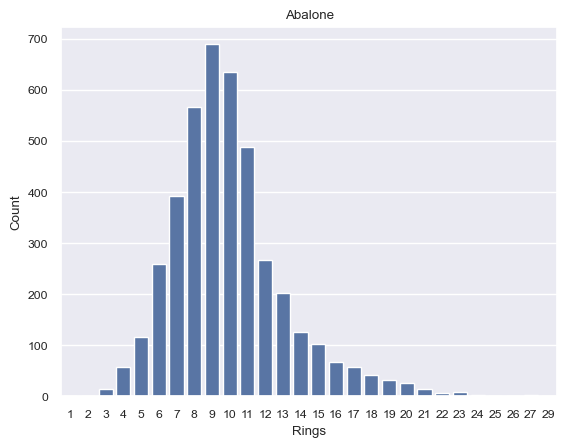

In [16]:
# Rings 시각화
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Abalone")

plt.show()

### Rings는 연속적인 수치 데이터를 가지므로 Classification 문제로 다루기 위해선 범주형 값으로 변환하는 과정이 필요

In [17]:
# 분위수 기반으로 구간 나누기
Rings_binned, bins = pd.qcut(df['Rings'], q=3, labels=['Young', 'Middle-aged', 'Old'], retbins=True)

# 구간 경계값 출력
print("구간 경계값: ", bins)

# 새로운 범주형 피처 생성
df['Rings_binned'] = Rings_binned

# 결과 확인
print(df[['Rings', 'Rings_binned']].head())

구간 경계값:  [ 1.  8. 11. 29.]
   Rings Rings_binned
0     15          Old
1      7        Young
2      9  Middle-aged
3     10  Middle-aged
4      7        Young


### pd.qcut 함수를 통해 각 구간에 비슷한 개수의 샘플이 있도록 분위수를 기준으로 구간을 나눔
- 구간 경계 값을 출력한 결과 (1 ~ 7, 8 ~ 10, 11 ~ 29)의 세 구간('Young', 'Middle-aged', 'Old')으로 나눠진 것을 확인할 수 있음

In [18]:
df['Rings_binned'].value_counts()

Rings_binned
Middle-aged    1810
Young          1405
Old             960
Name: count, dtype: int64

### 분위 수를 기반으로 나눴지만 Middle-aged와 Old 간의 차이가 두 배정도 나는 것을 확인할 수 있음
- 추후 OverSampling, UnderSampling 등을 적용할 수 있음

In [19]:
df = df.drop('Rings', axis=1)
df

,Sex_encoded,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings_binned
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,Old
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,Young
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,Middle-aged
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,Middle-aged
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,Young
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,Middle-aged
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,Middle-aged
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,Middle-aged
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,Middle-aged


In [20]:
import numpy as np
from collections import Counter

# split_sequence 함수 (수정됨)
def split_sequence(sequence, labels, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        
        # sequence에서 n_steps 크기만큼 데이터 추출
        seq_x = sequence[i:end_ix]
        
        # labels에서 n_steps 크기만큼 레이블 추출
        seq_y = labels[i:end_ix]
        
        # seq_y에서 가장 많이 등장한 레이블 선택
        most_common_label = Counter(seq_y).most_common(1)[0][0]
        
        # X와 y에 추가
        X.append(seq_x)
        y.append(most_common_label)
    
    return np.array(X), np.array(y)

In [21]:
# 실제 데이터 적용
sequence = df.drop('Rings_binned', axis=1).values  # 수치형 데이터
labels = df['Rings_binned'].values  # 범주형 레이블 'Rings_binned'

# 시퀀스 분리
n_steps = 7
X, y = split_sequence(sequence, labels, n_steps)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=32)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((2667, 7, 8), (834, 7, 8), (2667,), (834,), (667, 7, 8), (667,))

In [23]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

In [24]:
from tensorflow.keras.utils import to_categorical

trainy_one_hot = to_categorical(y_train_encoded)
val_one_hot = to_categorical(y_val_encoded)
testy_one_hot = to_categorical(y_test_encoded)

## DL Model (CNN)

In [25]:
n_timesteps, n_features = X_train.shape[1], X_train.shape[2]

In [26]:
model = Sequential()
model.add(LSTM(units = 32, input_shape = (n_timesteps, n_features),  return_sequences=True, activation='relu'))
model.add(Dropout(0.5))
model.add(LSTM(units = 48, return_sequences=True, activation='relu'))
model.add((Dropout(0.5)))
model.add(LSTM(64, activation='relu'))
model.add((Dropout(0.5)))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 32)             5248      
                                                                 
 dropout (Dropout)           (None, 7, 32)             0         
                                                                 
 lstm_1 (LSTM)               (None, 7, 48)             15552     
                                                                 
 dropout_1 (Dropout)         (None, 7, 48)             0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                28928     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 16)                1

In [27]:
batch_size = 16

train_epochs = 50
history = model.fit(X_train, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, validation_data=(X_val, val_one_hot), verbose=True, shuffle=True)

Epoch 1/50
167/167 [==============================] - 9s 37ms/step - loss: 0.9828 - accuracy: 0.5201 - val_loss: 0.8596 - val_accuracy: 0.6282
Epoch 2/50
167/167 [==============================] - 5s 29ms/step - loss: 0.8507 - accuracy: 0.6213 - val_loss: 0.7854 - val_accuracy: 0.6342
Epoch 3/50
167/167 [==============================] - 5s 30ms/step - loss: 0.8090 - accuracy: 0.6307 - val_loss: 0.7742 - val_accuracy: 0.6402
Epoch 4/50
167/167 [==============================] - 5s 28ms/step - loss: 0.7948 - accuracy: 0.6303 - val_loss: 0.7572 - val_accuracy: 0.6432
Epoch 5/50
167/167 [==============================] - 5s 29ms/step - loss: 0.7751 - accuracy: 0.6400 - val_loss: 0.7422 - val_accuracy: 0.6537
Epoch 6/50
167/167 [==============================] - 5s 29ms/step - loss: 0.7567 - accuracy: 0.6333 - val_loss: 0.7434 - val_accuracy: 0.6552
Epoch 7/50
167/167 [==============================] - 5s 29ms/step - loss: 0.7435 - accuracy: 0.6430 - val_loss: 0.7381 - val_accuracy: 0.6402

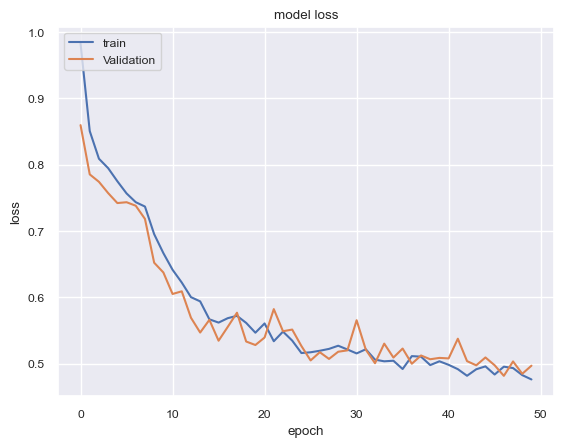

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

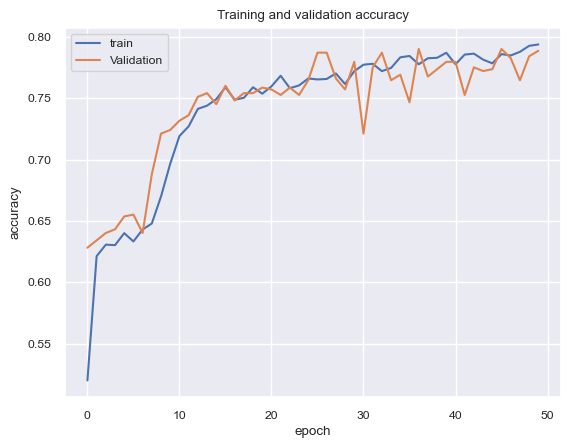

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

27/27 [==============================] - 0s 4ms/step
[[323  37  19]
 [ 47 143   2]
 [ 51   1 211]]
0.8117505995203836
0.8123187045456657
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       379
           1       0.79      0.74      0.77       192
           2       0.91      0.80      0.85       263

    accuracy                           0.81       834
   macro avg       0.82      0.80      0.81       834
weighted avg       0.82      0.81      0.81       834



<Axes: >

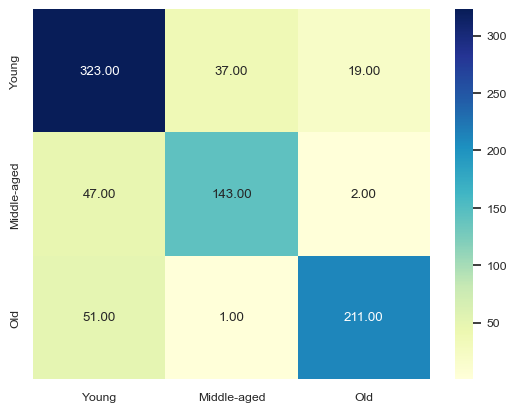

In [30]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

predy=model.predict(X_test)
predy=np.argmax(predy, axis=-1)
LABELS = ['Young', 'Middle-aged', 'Old']
cm=confusion_matrix(y_test_encoded,predy)
print(cm)
print(accuracy_score(y_test_encoded,predy))
print(f1_score(y_test_encoded,predy, average='weighted'))
print(classification_report(y_test_encoded,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

### 데이터 전처리 단계에서 정확도 올리기
- Rings와 상관관계가 비교적 낮았던 Sex_encoded, Shucked_weight 제거
- Smote 함수를 사용한 label OverSampling

In [31]:
df = df.drop(['Sex_encoded'], axis=1)
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings_binned
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,Old
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,Young
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,Middle-aged
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,Middle-aged
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,Young
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,Middle-aged
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,Middle-aged
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,Middle-aged
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,Middle-aged


In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(df.drop('Rings_binned', axis=1), df['Rings_binned'])

In [33]:
y_resampled.value_counts()

Rings_binned
Young          1810
Middle-aged    1810
Old            1810
Name: count, dtype: int64

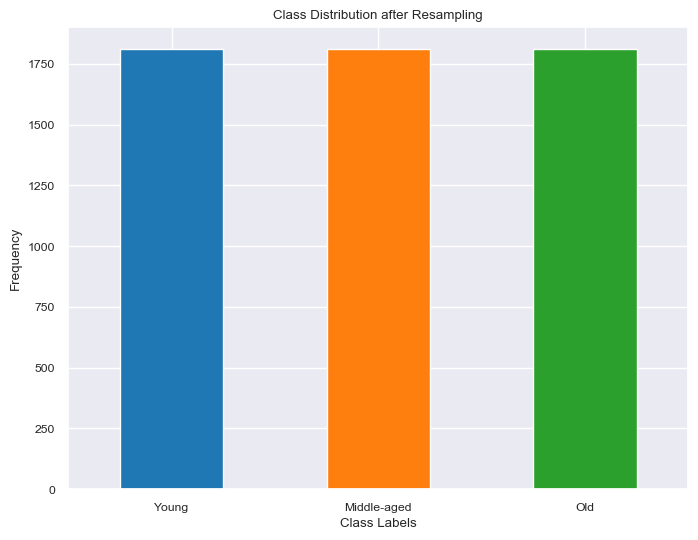

In [34]:
import matplotlib.pyplot as plt

# y_resampled의 클래스 분포를 계산
value_counts = y_resampled.value_counts()

# 시각화
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color=["#1f77b4", "#ff7f0e", "#2ca02c"])  # 막대그래프 생성
plt.title('Class Distribution after Resampling')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # x축 레이블 수평으로 표시
plt.show()

In [35]:
# 실제 데이터 적용
sequence = X_resampled.values  # 수치형 데이터
labels = y_resampled.values  # 범주형 레이블 'Rings_binned'

# 시퀀스 분리
n_steps = 7
X, y = split_sequence(sequence, labels, n_steps)

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=32)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((3470, 7, 7), (1085, 7, 7), (3470,), (1085,), (868, 7, 7), (868,))

In [37]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

In [38]:
from tensorflow.keras.utils import to_categorical

trainy_one_hot = to_categorical(y_train_encoded)
val_one_hot = to_categorical(y_val_encoded)
testy_one_hot = to_categorical(y_test_encoded)

In [39]:
n_timesteps, n_features = X_train.shape[1], X_train.shape[2]

In [40]:
model = Sequential()
model.add(LSTM(units = 32, input_shape = (n_timesteps, n_features),  return_sequences=True, activation='relu'))
model.add(Dropout(0.5))
model.add(LSTM(units = 48, return_sequences=True, activation='relu'))
model.add((Dropout(0.5)))
model.add(LSTM(64, activation='relu'))
model.add((Dropout(0.5)))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 7, 32)             5120      
                                                                 
 dropout_3 (Dropout)         (None, 7, 32)             0         
                                                                 
 lstm_4 (LSTM)               (None, 7, 48)             15552     
                                                                 
 dropout_4 (Dropout)         (None, 7, 48)             0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                28928     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 16)               

In [41]:
batch_size = 16

train_epochs = 50
history = model.fit(X_train, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, validation_data=(X_val, val_one_hot), verbose=True, shuffle=True)

Epoch 1/50
217/217 [==============================] - 9s 33ms/step - loss: 0.9669 - accuracy: 0.4712 - val_loss: 0.8783 - val_accuracy: 0.5645
Epoch 2/50
217/217 [==============================] - 7s 30ms/step - loss: 0.8216 - accuracy: 0.5692 - val_loss: 0.8189 - val_accuracy: 0.5403
Epoch 3/50
217/217 [==============================] - 7s 30ms/step - loss: 0.7914 - accuracy: 0.5732 - val_loss: 0.8018 - val_accuracy: 0.5611
Epoch 4/50
217/217 [==============================] - 6s 29ms/step - loss: 0.7756 - accuracy: 0.5994 - val_loss: 0.7830 - val_accuracy: 0.5415
Epoch 5/50
217/217 [==============================] - 6s 30ms/step - loss: 0.7577 - accuracy: 0.5882 - val_loss: 0.7508 - val_accuracy: 0.6048
Epoch 6/50
217/217 [==============================] - 6s 30ms/step - loss: 0.7165 - accuracy: 0.6458 - val_loss: 0.6799 - val_accuracy: 0.7097
Epoch 7/50
217/217 [==============================] - 6s 29ms/step - loss: 0.6630 - accuracy: 0.7127 - val_loss: 0.5668 - val_accuracy: 0.7558

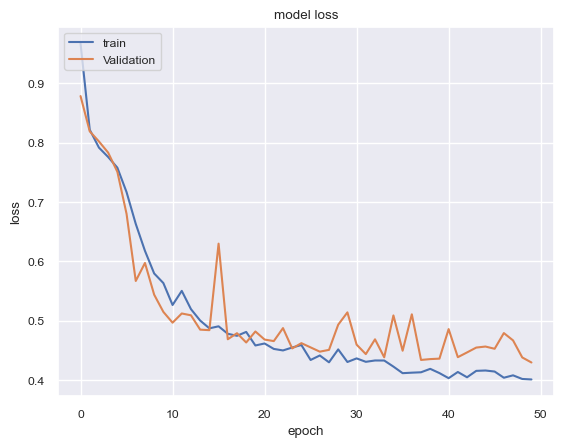

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

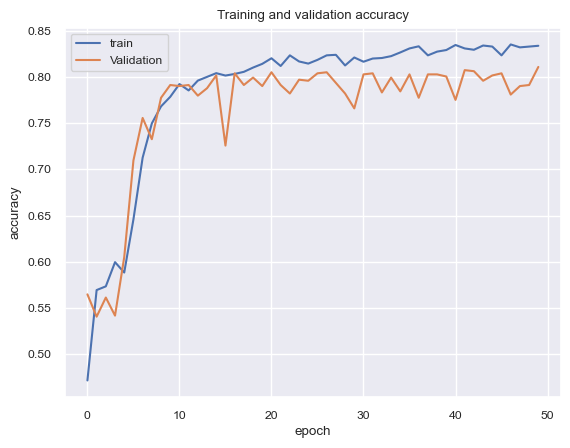

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

34/34 [==============================] - 0s 4ms/step
[[298  44  38]
 [ 47 304  11]
 [ 34   8 301]]
0.832258064516129
0.832159085532372
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       380
           1       0.85      0.84      0.85       362
           2       0.86      0.88      0.87       343

    accuracy                           0.83      1085
   macro avg       0.83      0.83      0.83      1085
weighted avg       0.83      0.83      0.83      1085



<Axes: >

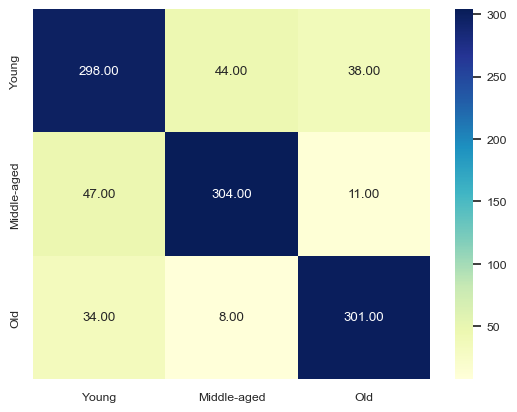

In [44]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

predy=model.predict(X_test)
predy=np.argmax(predy, axis=-1)
LABELS = ['Young', 'Middle-aged', 'Old']
cm=confusion_matrix(y_test_encoded,predy)
print(cm)
print(accuracy_score(y_test_encoded,predy))
print(f1_score(y_test_encoded,predy, average='weighted'))
print(classification_report(y_test_encoded,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')